In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AIfinal

/content/drive/MyDrive/AIfinal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Load the dataset
maternal_health_df = pd.read_csv('/content/drive/MyDrive/AIfinal/MaternalHealth.csv')

# Display first few rows
print(maternal_health_df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [ ]:
# Check for missing values
print("Missing Values:\n", maternal_health_df.isnull().sum())

# Encode categorical target variable if necessary
if maternal_health_df["RiskLevel"].dtype == 'object':
    label_encoder = LabelEncoder()
    maternal_health_df["RiskLevel"] = label_encoder.fit_transform(maternal_health_df["RiskLevel"])

# Split into features and target
X = maternal_health_df.drop(columns=["RiskLevel"])
y = maternal_health_df["RiskLevel"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Missing Values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


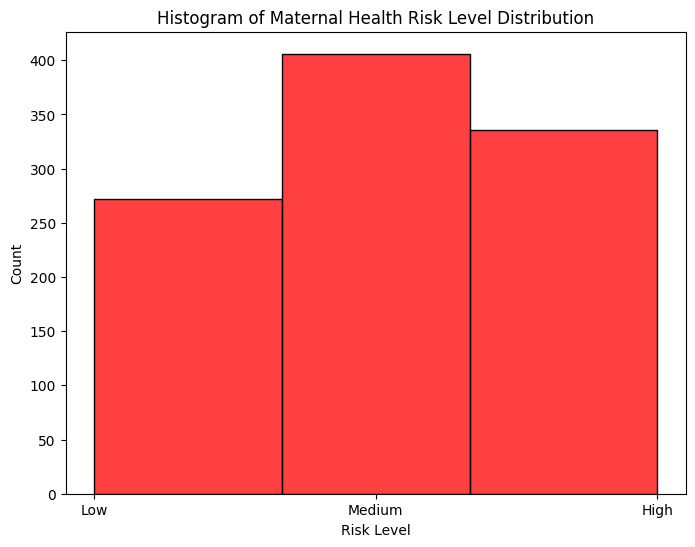

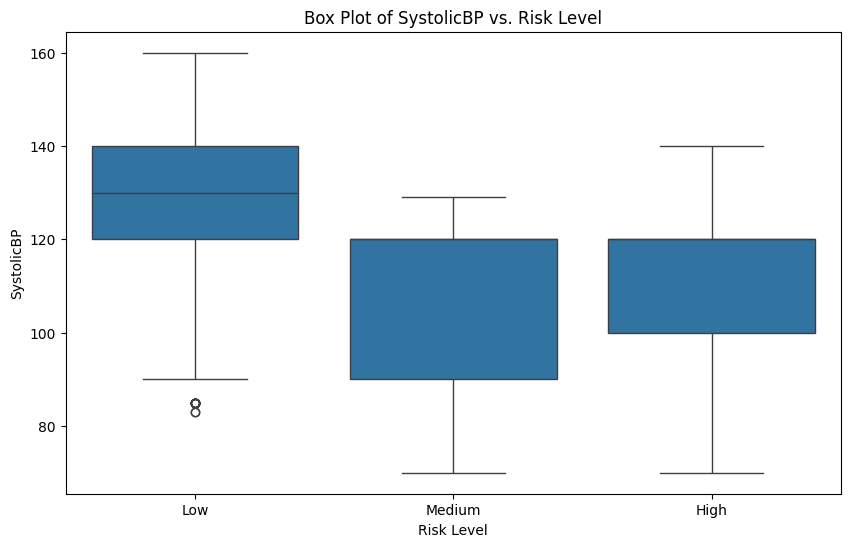

In [ ]:


# HISTOGRAM: Maternal Health Risk Level Distribution
plt.figure(figsize=(8, 6))
sns.histplot(maternal_health_df["RiskLevel"], bins=3, kde=False, color='red')
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.title("Histogram of Maternal Health Risk Level Distribution")
plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "High"])
plt.show()

# BOX PLOT: SystolicBP vs. Risk Level
plt.figure(figsize=(10, 6))
sns.boxplot(x=maternal_health_df["RiskLevel"], y=maternal_health_df["SystolicBP"])
plt.xlabel("Risk Level")
plt.ylabel("SystolicBP")
plt.title("Box Plot of SystolicBP vs. Risk Level")
plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "High"])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # More trees for better accuracy
    'max_depth': [10, 20, None],  # Prevent overfitting
    'min_samples_split': [2, 5, 10]  # Improve generalization
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Train best model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate Classification Model
from sklearn.metrics import classification_report
print("Updated Classification Report:\n", classification_report(y_test, y_pred))





Updated Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.86      0.74      0.79        80
           2       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.86      0.75      0.80        80
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203

Accuracy: 0.8078817733990148


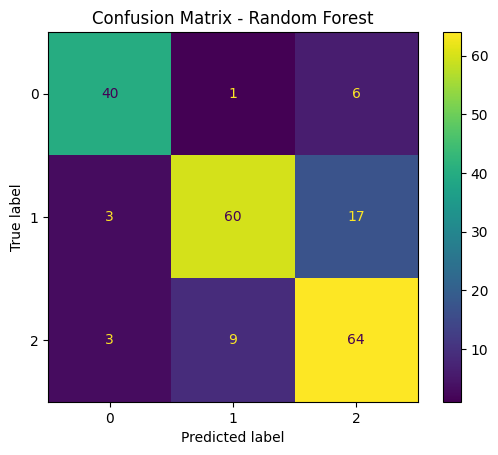

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict
rf_pred = rf_classifier.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
# GridSearch for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
